<a href="https://colab.research.google.com/github/VarunKoduru/Machine-Learning/blob/main/ML_Assignment_1_185.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. REGRESSION

(a) Load the data into memory. Make an appropriate X matrix and y vector.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, accuracy_score
from sklearn.preprocessing import StandardScaler

# Choose dataset: Breast Cancer Wisconsin (binary classification)
data = load_breast_cancer()
X_original = data.data
y = data.target  # 0: malignant, 1: benign

# Standardize features for better basis function application
scaler = StandardScaler()
X = scaler.fit_transform(X_original)

n_samples, n_features = X.shape
print(f"Dataset loaded: {n_samples} samples, {n_features} features")

Dataset loaded: 569 samples, 30 features


(b) Split the data at random into one set (Xtrain, ytrain) containing 80% of the instances, which will
be used for training + validation, and a testing set Xtest, ytest) (containing remaining instances).

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Train: {X_train.shape[0]} samples, Test: {X_test.shape[0]} samples")

Train: 455 samples, Test: 114 samples


(c) Give the objective of logistic regression with L2 regularization.

(C) Objective of Logistic Regression with L2 regularization:

Prevents overfitting by adding a penalty term to the loss function. This penalty is proportional to the square of the magnitude of the coefficients (weights). The standard loss function:


'λ' is the regularization parameter that controls the strength of the penalty, and wi are the coefficients.
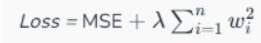
Coefficients become as small as possible but not zero, so that no feature dominate the other.

In this regression all features are considered.

The larger the ' λ ' value, the stronger the regularization, and the smaller the coefficients will become.




(d) Run logistic regression on the data using L2 regularization, varying the regularization parameter
λ ∈ {0, 0.1, 1, 10, 100, 1000}. Plot on one graph the average cross-entropy for the training data
and the testing data (averaged over all instances), as a function of λ (you should use a log scale
for λ). Plot on another graph the L2 norm of the weight vector you obtain. Plot on the third
graph the actual values of the weights obtained (one curve per weight). Finally, plot on a
graph the accuracy on the training and test set. Explain briefly what you see.

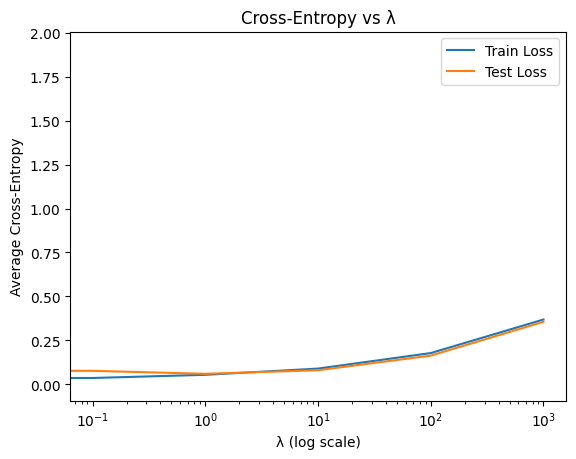

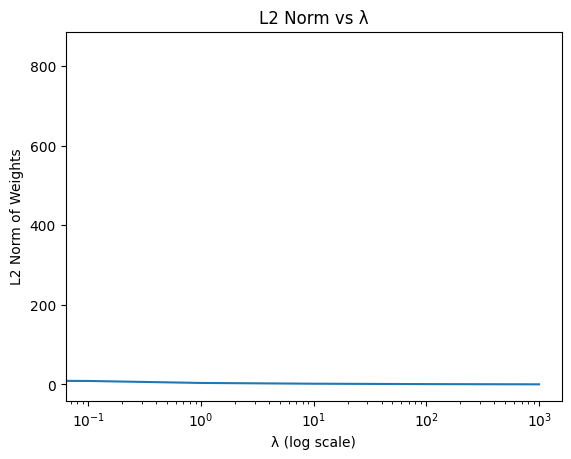

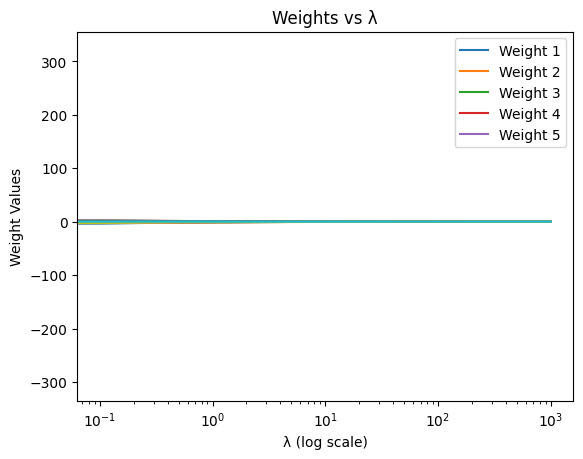

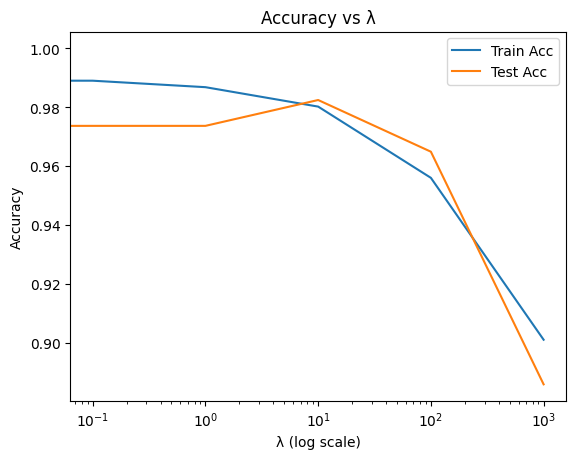

In [11]:
lambdas = [0, 0.1, 1, 10, 100, 1000]
train_losses = []
test_losses = []
train_accs = []
test_accs = []
w_norms = []
all_weights = []  # List of weight arrays for each lambda

for lam in lambdas:
    if lam == 0:
        model = LogisticRegression(penalty=None, max_iter=1000)
    else:
        model = LogisticRegression(penalty='l2', C=1/lam, max_iter=1000)

    model.fit(X_train, y_train)

    # Probabilities
    train_prob = model.predict_proba(X_train)
    test_prob = model.predict_proba(X_test)

    # Cross-entropy (log loss)
    train_loss = log_loss(y_train, train_prob)
    test_loss = log_loss(y_test, test_prob)
    train_losses.append(train_loss)
    test_losses.append(test_loss)

    # Accuracy
    train_acc = accuracy_score(y_train, model.predict(X_train))
    test_acc = accuracy_score(y_test, model.predict(X_test))
    train_accs.append(train_acc)
    test_accs.append(test_acc)

    # L2 norm of weights (excluding intercept)
    w_norm = np.linalg.norm(model.coef_.flatten())
    w_norms.append(w_norm)

    # Store weights
    all_weights.append(model.coef_.flatten())

# Plot 1: Cross-entropy vs log lambda
plt.figure()
plt.semilogx(lambdas, train_losses, label='Train Loss')
plt.semilogx(lambdas, test_losses, label='Test Loss')
plt.xlabel('λ (log scale)')
plt.ylabel('Average Cross-Entropy')
plt.legend()
plt.title('Cross-Entropy vs λ')
plt.show()

# Plot 2: L2 norm of weights vs log lambda
plt.figure()
plt.semilogx(lambdas, w_norms)
plt.xlabel('λ (log scale)')
plt.ylabel('L2 Norm of Weights')
plt.title('L2 Norm vs λ')
plt.show()

# Plot 3: Weight values vs log lambda (one curve per weight)
plt.figure()
for i in range(n_features):
    weights_i = [w[i] for w in all_weights]
    plt.semilogx(lambdas, weights_i, label=f'Weight {i+1}' if i < 5 else None)  # Label only first few for clarity
plt.xlabel('λ (log scale)')
plt.ylabel('Weight Values')
plt.title('Weights vs λ')
plt.legend()
plt.show()

# Plot 4: Accuracy vs log lambda
plt.figure()
plt.semilogx(lambdas, train_accs, label='Train Acc')
plt.semilogx(lambdas, test_accs, label='Test Acc')
plt.xlabel('λ (log scale)')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy vs λ')
plt.show()

(e) Re-format the data in the following way: take each of the input variables, and feed it through a set of Gaussian basis functions, defined as follows. For each variable (except the bias term), use 5 univariate basis functions with means evenly spaced between -10 and 10 and variance σ. You will experiment with σ values of 0.1, 0.5, 1, 5 and 10.

In [12]:
def gaussian_basis_expand(X, mus, sigma):
    expanded = []
    for j in range(X.shape[1]):
        x_j = X[:, j].reshape(-1, 1)  # n x 1
        phi_j = np.exp(- (x_j - mus) ** 2 / (2 * sigma ** 2))  # n x 5
        expanded.append(phi_j)
    return np.hstack(expanded)  # n x (d*5)

mus = np.linspace(-10, 10, 5)
sigmas = [0.1, 0.5, 1, 5, 10]

(f) Using no regularization and doing regression with this new set of basis functions, plot the training and testing error as a function of σ (when using only basis functions of a given σ). Add constant lines showing the training and testing error you had obtained in part c. Explain how σ influences overfitting and the bias-variance trade-off.

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


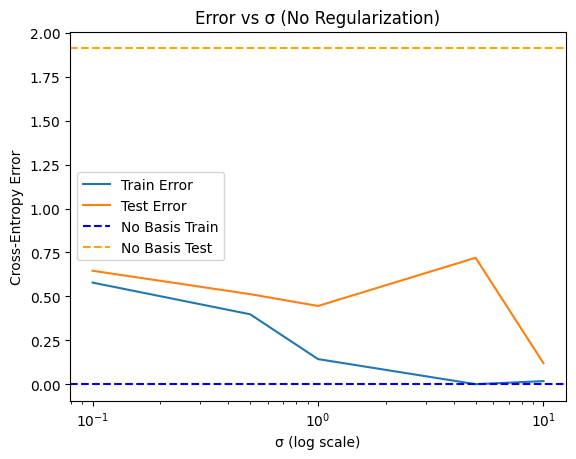

In [13]:
train_errors_f = []
test_errors_f = []

for sigma in sigmas:
    X_train_exp = gaussian_basis_expand(X_train, mus, sigma)
    X_test_exp = gaussian_basis_expand(X_test, mus, sigma)

    model = LogisticRegression(penalty=None, max_iter=1000)
    model.fit(X_train_exp, y_train)

    train_prob = model.predict_proba(X_train_exp)
    test_prob = model.predict_proba(X_test_exp)

    train_error = log_loss(y_train, train_prob)
    test_error = log_loss(y_test, test_prob)

    train_errors_f.append(train_error)
    test_errors_f.append(test_error)

# From part (d), no reg errors (lambda=0)
no_reg_train_error = train_losses[0]
no_reg_test_error = test_losses[0]

# Plot
plt.figure()
plt.plot(sigmas, train_errors_f, label='Train Error')
plt.plot(sigmas, test_errors_f, label='Test Error')
plt.axhline(no_reg_train_error, color='blue', linestyle='--', label='No Basis Train')
plt.axhline(no_reg_test_error, color='orange', linestyle='--', label='No Basis Test')
plt.xscale('log')
plt.xlabel('σ (log scale)')
plt.ylabel('Cross-Entropy Error')
plt.legend()
plt.title('Error vs σ (No Regularization)')
plt.show()

(g) Add in all the basis function and perform regularized regression with the regularization parameter λ ∈ {0, 0.1, 1, 10, 100, 1000, 10000}. Plot on one graph the average cross- entropy error for the training data and the testing data, as a function of λ (you should use a log scale for λ). Plot on another graph the L2 norm of the weight vector you obtain. Plot on a different graph the L2 norm of the weights for the set of basis functions corresponding to each value of σ, as a function of λ (this will be a graph with 5 lines on it). Explain briefly the results.

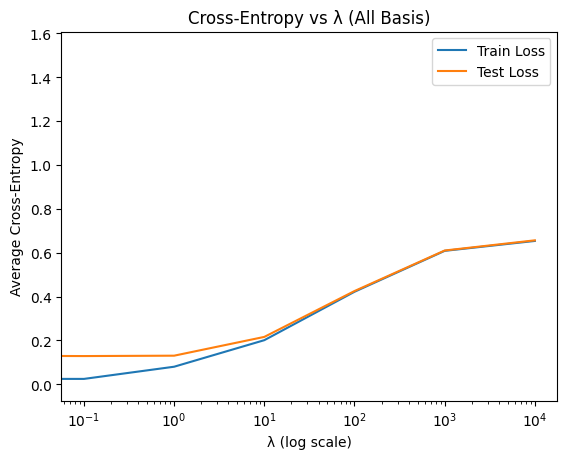

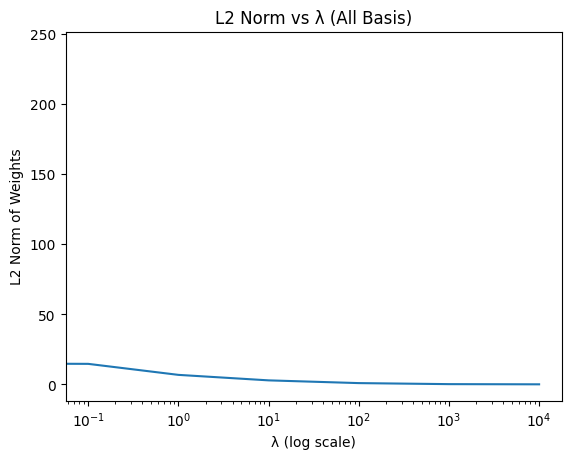

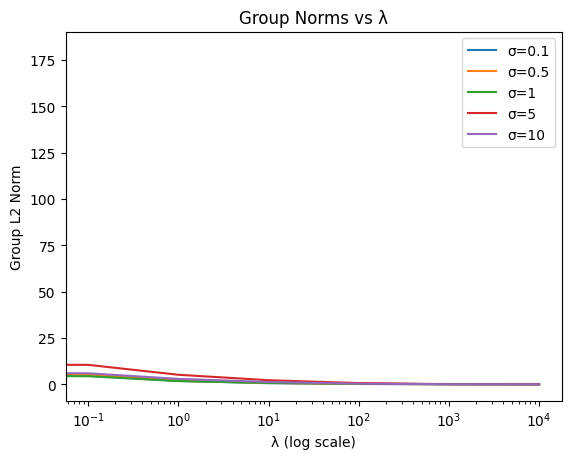

In [14]:
lambdas_g = [0, 0.1, 1, 10, 100, 1000, 10000]

# Expand with all sigmas: concatenate expansions for each sigma
X_train_all = np.hstack([gaussian_basis_expand(X_train, mus, sigma) for sigma in sigmas])
X_test_all = np.hstack([gaussian_basis_expand(X_test, mus, sigma) for sigma in sigmas])

basis_per_sigma = X_train.shape[1] * len(mus)  # 30 * 5 = 150 per sigma

train_losses_g = []
test_losses_g = []
w_norms_g = []
group_norms = {sigma: [] for sigma in sigmas}  # L2 norms per sigma group

for lam in lambdas_g:
    if lam == 0:
        model = LogisticRegression(penalty=None, max_iter=1000)
    else:
        model = LogisticRegression(penalty='l2', C=1/lam, max_iter=1000)

    model.fit(X_train_all, y_train)

    train_prob = model.predict_proba(X_train_all)
    test_prob = model.predict_proba(X_test_all)

    train_loss = log_loss(y_train, train_prob)
    test_loss = log_loss(y_test, test_prob)
    train_losses_g.append(train_loss)
    test_losses_g.append(test_loss)

    w = model.coef_.flatten()
    w_norm = np.linalg.norm(w)
    w_norms_g.append(w_norm)

    # Group norms
    for idx, sigma in enumerate(sigmas):
        start = idx * basis_per_sigma
        end = start + basis_per_sigma
        w_group = w[start:end]
        group_norm = np.linalg.norm(w_group)
        group_norms[sigma].append(group_norm)

# Plot 1: Cross-entropy vs log lambda
plt.figure()
plt.semilogx(lambdas_g, train_losses_g, label='Train Loss')
plt.semilogx(lambdas_g, test_losses_g, label='Test Loss')
plt.xlabel('λ (log scale)')
plt.ylabel('Average Cross-Entropy')
plt.legend()
plt.title('Cross-Entropy vs λ (All Basis)')
plt.show()

# Plot 2: L2 norm of weights vs log lambda
plt.figure()
plt.semilogx(lambdas_g, w_norms_g)
plt.xlabel('λ (log scale)')
plt.ylabel('L2 Norm of Weights')
plt.title('L2 Norm vs λ (All Basis)')
plt.show()

# Plot 3: Group L2 norms vs log lambda (5 lines)
plt.figure()
for sigma in sigmas:
    plt.semilogx(lambdas_g, group_norms[sigma], label=f'σ={sigma}')
plt.xlabel('λ (log scale)')
plt.ylabel('Group L2 Norm')
plt.legend()
plt.title('Group Norms vs λ')
plt.show()

(h) Explain what you would need to do if you wanted to design a set of Gaussian basis functions that capture relationships between the inputs. Explain the impact of this choice on the bias-variance trade-off. No experiments are needed (although you are welcome to explore this on your own).

To capture relationships between inputs, use multivariate Gaussian basis functions instead of univariate. For a d-dimensional input x, a basis function would be φ_k(x) = exp( - (x - μ_k)^T Σ_k^{-1} (x - μ_k) / 2 ), where μ_k is a d-dimensional mean vector, and Σ_k is a covariance matrix (e.g., diagonal for axis-aligned, or full for correlations).
This increases model flexibility to capture interactions and non-linear relationships across features. Impact on bias-variance: It reduces bias (better fit complex data) but increases variance (more parameters, higher overfitting risk), requiring more data or stronger regularization to balance.

Q(i) Adaptive Basis Placement Algorithm

Theory + Outline:

Initialize centers μ randomly.

Iteratively:

Fix μ → update w using logistic regression with L2 penalty.

Fix w → update μ using gradient descent.

Repeat until convergence.

This resembles an EM-like algorithm.


(j) Does your algorithm converge? If so, does it obtain a locally or globally optimal solution? Explain your answer.

The algorithm converges to a stationary point if the learning rate η is appropriately chosen (e.g., decreasing), as gradient descent on a differentiable function will decrease the loss until gradients are near zero. However, since the objective is non-convex (due to the sigmoid and the exponential dependence on μ), it obtains a locally optimal solution, not necessarily global. Multiple initializations may be needed to find better optima.3sExpert

2. Experiment on any complex datasets to demonstrate the Linear REGRESSION and its versions, and
logistic regression (CLASSIFICATION) along with complete data preprocessing steps.

California Housing Dataset:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  

Target (first 5): [4.526 3.585 3.521 3.413 3.422]

Missing values: 0

Linear Regression:
MSE: 0.555891598695244
R2: 0.5757877060324511

Ridge Regression:
MSE: 0.5558512007367514
R2: 0.575818534544132

Lasso Regression:
MSE: 0.6795515190149223
R2: 0.4814202815313765

ElasticNet:
MSE: 0.6357612809406279
R2: 0.5148375114202305


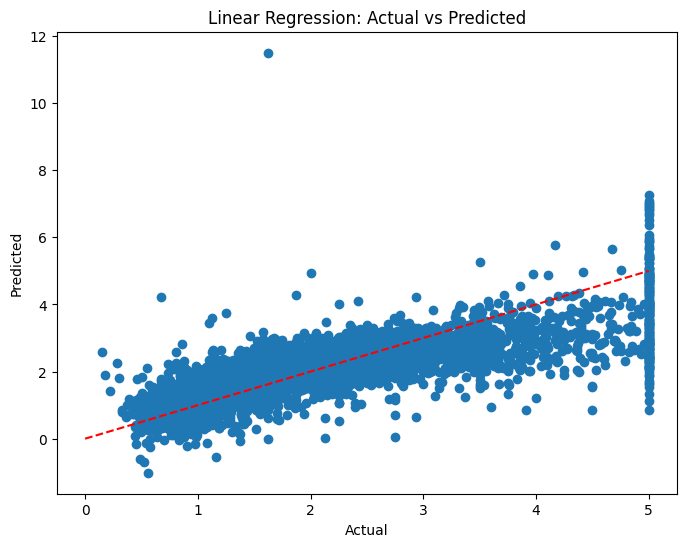


Breast Cancer Dataset:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst p

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report

# Part 1: Linear Regression and its versions on California Housing dataset (regression task)
# Dataset: California Housing - complex with 8 features, 20640 samples, predicting median house value

# Step 1: Load the dataset
housing = fetch_california_housing()
X_housing = pd.DataFrame(housing.data, columns=housing.feature_names)
y_housing = housing.target

print("California Housing Dataset:")
print(X_housing.head())
print("\nTarget (first 5):", y_housing[:5])

# Step 2: Data Preprocessing
# Check for missing values
print("\nMissing values:", X_housing.isnull().sum().sum())  # None

# Feature scaling (important for regularization)
scaler_housing = StandardScaler()
X_housing_scaled = scaler_housing.fit_transform(X_housing)

# Split into train and test (80/20)
X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(X_housing_scaled, y_housing, test_size=0.2, random_state=42)

# Step 3: Linear Regression (Ordinary Least Squares)
lr = LinearRegression()
lr.fit(X_train_h, y_train_h)
y_pred_lr = lr.predict(X_test_h)
mse_lr = mean_squared_error(y_test_h, y_pred_lr)
r2_lr = r2_score(y_test_h, y_pred_lr)
print("\nLinear Regression:")
print("MSE:", mse_lr)
print("R2:", r2_lr)

# Step 4: Ridge Regression (L2 regularization)
ridge = Ridge(alpha=1.0)  # alpha is lambda
ridge.fit(X_train_h, y_train_h)
y_pred_ridge = ridge.predict(X_test_h)
mse_ridge = mean_squared_error(y_test_h, y_pred_ridge)
r2_ridge = r2_score(y_test_h, y_pred_ridge)
print("\nRidge Regression:")
print("MSE:", mse_ridge)
print("R2:", r2_ridge)

# Step 5: Lasso Regression (L1 regularization)
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_h, y_train_h)
y_pred_lasso = lasso.predict(X_test_h)
mse_lasso = mean_squared_error(y_test_h, y_pred_lasso)
r2_lasso = r2_score(y_test_h, y_pred_lasso)
print("\nLasso Regression:")
print("MSE:", mse_lasso)
print("R2:", r2_lasso)

# Step 6: ElasticNet (L1 + L2)
elastic = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic.fit(X_train_h, y_train_h)
y_pred_elastic = elastic.predict(X_test_h)
mse_elastic = mean_squared_error(y_test_h, y_pred_elastic)
r2_elastic = r2_score(y_test_h, y_pred_elastic)
print("\nElasticNet:")
print("MSE:", mse_elastic)
print("R2:", r2_elastic)

# Visualization: Actual vs Predicted for Linear Regression
plt.figure(figsize=(8,6))
plt.scatter(y_test_h, y_pred_lr)
plt.plot([0,5], [0,5], '--r')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression: Actual vs Predicted')
plt.show()

# Part 2: Logistic Regression on Breast Cancer dataset (binary classification task)
# Dataset: Breast Cancer Wisconsin - complex with 30 features, 569 samples, predicting malignant/benign

# Step 1: Load the dataset
cancer = load_breast_cancer()
X_cancer = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y_cancer = cancer.target  # 0: malignant, 1: benign

print("\nBreast Cancer Dataset:")
print(X_cancer.head())
print("\nTarget (first 5):", y_cancer[:5])

# Step 2: Data Preprocessing
# Check for missing values
print("\nMissing values:", X_cancer.isnull().sum().sum())  # None

# Feature scaling (important for logistic regression)
scaler_cancer = StandardScaler()
X_cancer_scaled = scaler_cancer.fit_transform(X_cancer)

# Split into train and test (80/20)
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_cancer_scaled, y_cancer, test_size=0.2, random_state=42)

# Step 3: Logistic Regression (with L2 regularization by default in sklearn)
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_c, y_train_c)
y_pred_log = logreg.predict(X_test_c)
acc_log = accuracy_score(y_test_c, y_pred_log)
print("\nLogistic Regression:")
print("Accuracy:", acc_log)
print(classification_report(y_test_c, y_pred_log))

# To demonstrate versions, use different penalties
# L1 penalized Logistic
logreg_l1 = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)
logreg_l1.fit(X_train_c, y_train_c)
y_pred_l1 = logreg_l1.predict(X_test_c)
acc_l1 = accuracy_score(y_test_c, y_pred_l1)
print("\nLogistic Regression (L1):")
print("Accuracy:", acc_l1)
print(classification_report(y_test_c, y_pred_l1))

# ElasticNet penalized (requires saga solver)
logreg_en = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, max_iter=1000)
logreg_en.fit(X_train_c, y_train_c)
y_pred_en = logreg_en.predict(X_test_c)
acc_en = accuracy_score(y_test_c, y_pred_en)
print("\nLogistic Regression (ElasticNet):")
print("Accuracy:", acc_en)
print(classification_report(y_test_c, y_pred_en))